**TIME SERIES ANALYSIS AND FORECASTING : AIR QUALITY FORECASTING**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [3]:
df = pd.read_excel('/content/drive/MyDrive/time_series/AirQualityUCI.xlsx', sheet_name='AirQualityUCI')
display(df.head()) 

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [4]:
display(df.shape)

(9357, 15)

**DATSET INFORMATION <br>
0 Date (DD/MM/YYYY) <br>
1 Time (HH.MM.SS) <br>
2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) <br>
3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted) <br>
4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) <br>
5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) <br>
6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) <br>
7 True hourly averaged NOx concentration in ppb (reference analyzer) <br>
8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) <br>
9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) <br>
10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) <br>
11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) <br>
12 Temperature in Â°C <br>
13 Relative Humidity (%) <br>
14 AH Absolute Humidity <br>
##ALSO THE MISSING VALUES ARE REPLACED WITH -200##**  

In [5]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [6]:
numeric_feat = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)',
       'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

In [7]:
#HANDLING MISSING VALUES
#Time series models work with complete data, and therefore they require 
#the missing data to be replaced with meaningful values before actual 
#analysis.We would do Spline interpolation to handle the missing values

In [8]:
#How many missing values?
for col in enumerate(numeric_feat):
    x = col[1]
    y = df[col[1]].value_counts()[-200]
    print(f'Missing values in column {x}: {y}')

Missing values in column CO(GT): 1683
Missing values in column PT08.S1(CO): 366
Missing values in column NMHC(GT): 8443
Missing values in column C6H6(GT): 366
Missing values in column PT08.S2(NMHC): 366
Missing values in column NOx(GT): 1639
Missing values in column PT08.S3(NOx): 366
Missing values in column NO2(GT): 1642
Missing values in column PT08.S4(NO2): 366
Missing values in column PT08.S5(O3): 366
Missing values in column T: 366
Missing values in column RH: 366
Missing values in column AH: 366


In [9]:
#Replacing missing values with NAN
for col in enumerate(numeric_feat):
    df[col[1]] = df[col[1]].map(lambda x: np.nan if x in [-200] else x)

In [10]:
#Replacing NAN values using linear interpolation
for col in enumerate(numeric_feat):
    df[col[1]] = df[col[1]].interpolate(method='linear')
    

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [12]:
df.index=df['Time']

In [13]:
df['Time'] = df['Time'].astype("string")

In [14]:
df['Date'] = df['Date'].astype("string")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 18:00:00 to 14:00:00
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   string 
 1   Time           9357 non-null   string 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), string(2)
memory usage: 1.1+ MB


In [16]:
df['DateT'] = df['Date']+" "+df['Time']
df.insert(0, 'DateTime', value=df['DateT'])
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')
df.index = df['DateTime']
df.drop(['DateT'],axis = 1, inplace = True)
df.head(5)

,DateTime,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2004-03-10 21:00:00,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,2004-03-10 22:00:00,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       9357 non-null   datetime64[ns]
 1   Date           9357 non-null   string        
 2   Time           9357 non-null   string        
 3   CO(GT)         9357 non-null   float64       
 4   PT08.S1(CO)    9357 non-null   float64       
 5   NMHC(GT)       9357 non-null   float64       
 6   C6H6(GT)       9357 non-null   float64       
 7   PT08.S2(NMHC)  9357 non-null   float64       
 8   NOx(GT)        9357 non-null   float64       
 9   PT08.S3(NOx)   9357 non-null   float64       
 10  NO2(GT)        9357 non-null   float64       
 11  PT08.S4(NO2)   9357 non-null   float64       
 12  PT08.S5(O3)    9357 non-null   float64       
 13  T              9357 non-null   float64       
 14  RH             9357 non-null   float

In [18]:
print(f'Starting Date: ', df['DateTime'].min())
print(f'Ending Date:', df['DateTime'].max())
print(f'Time Rnage: ', df['DateTime'].max() - df['DateTime'].min())

Starting Date:  2004-03-10 18:00:00
Ending Date: 2005-04-04 14:00:00
Time Rnage:  389 days 20:00:00


In [19]:
df.columns

Index(['DateTime', 'Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)',
       'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

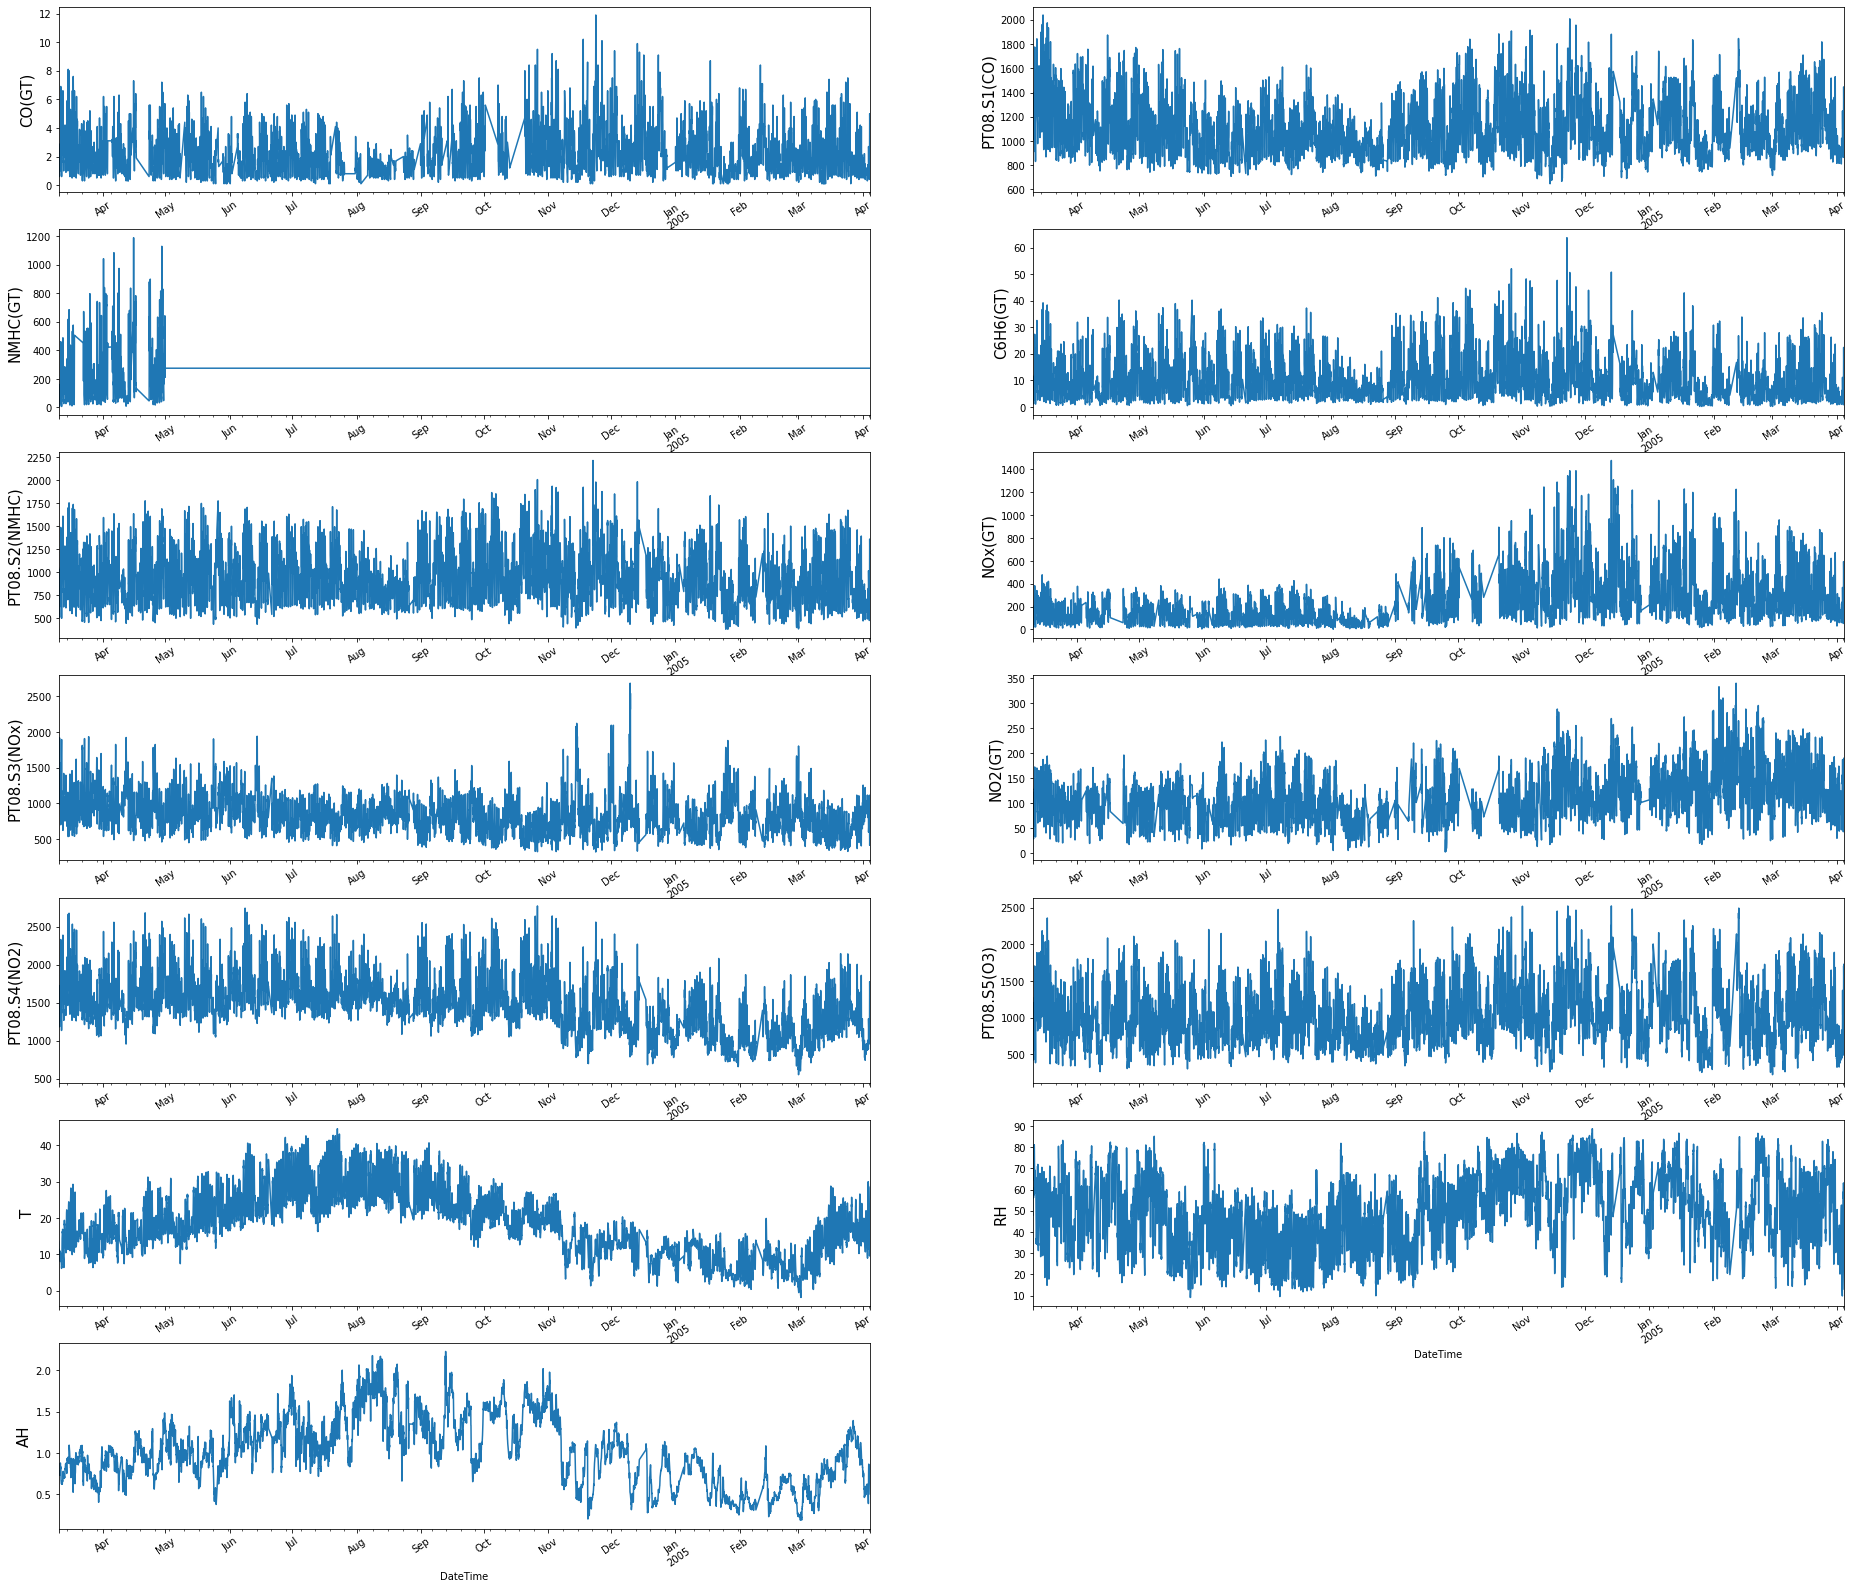

In [20]:
plt.figure(figsize=(32,28))
for i in enumerate(numeric_feat):
    plt.subplot(7,2,i[0]+1)
    co = df[i[1]]
    co.plot()
    plt.ylabel(i[1], fontsize=15)
    plt.xticks(rotation=35)

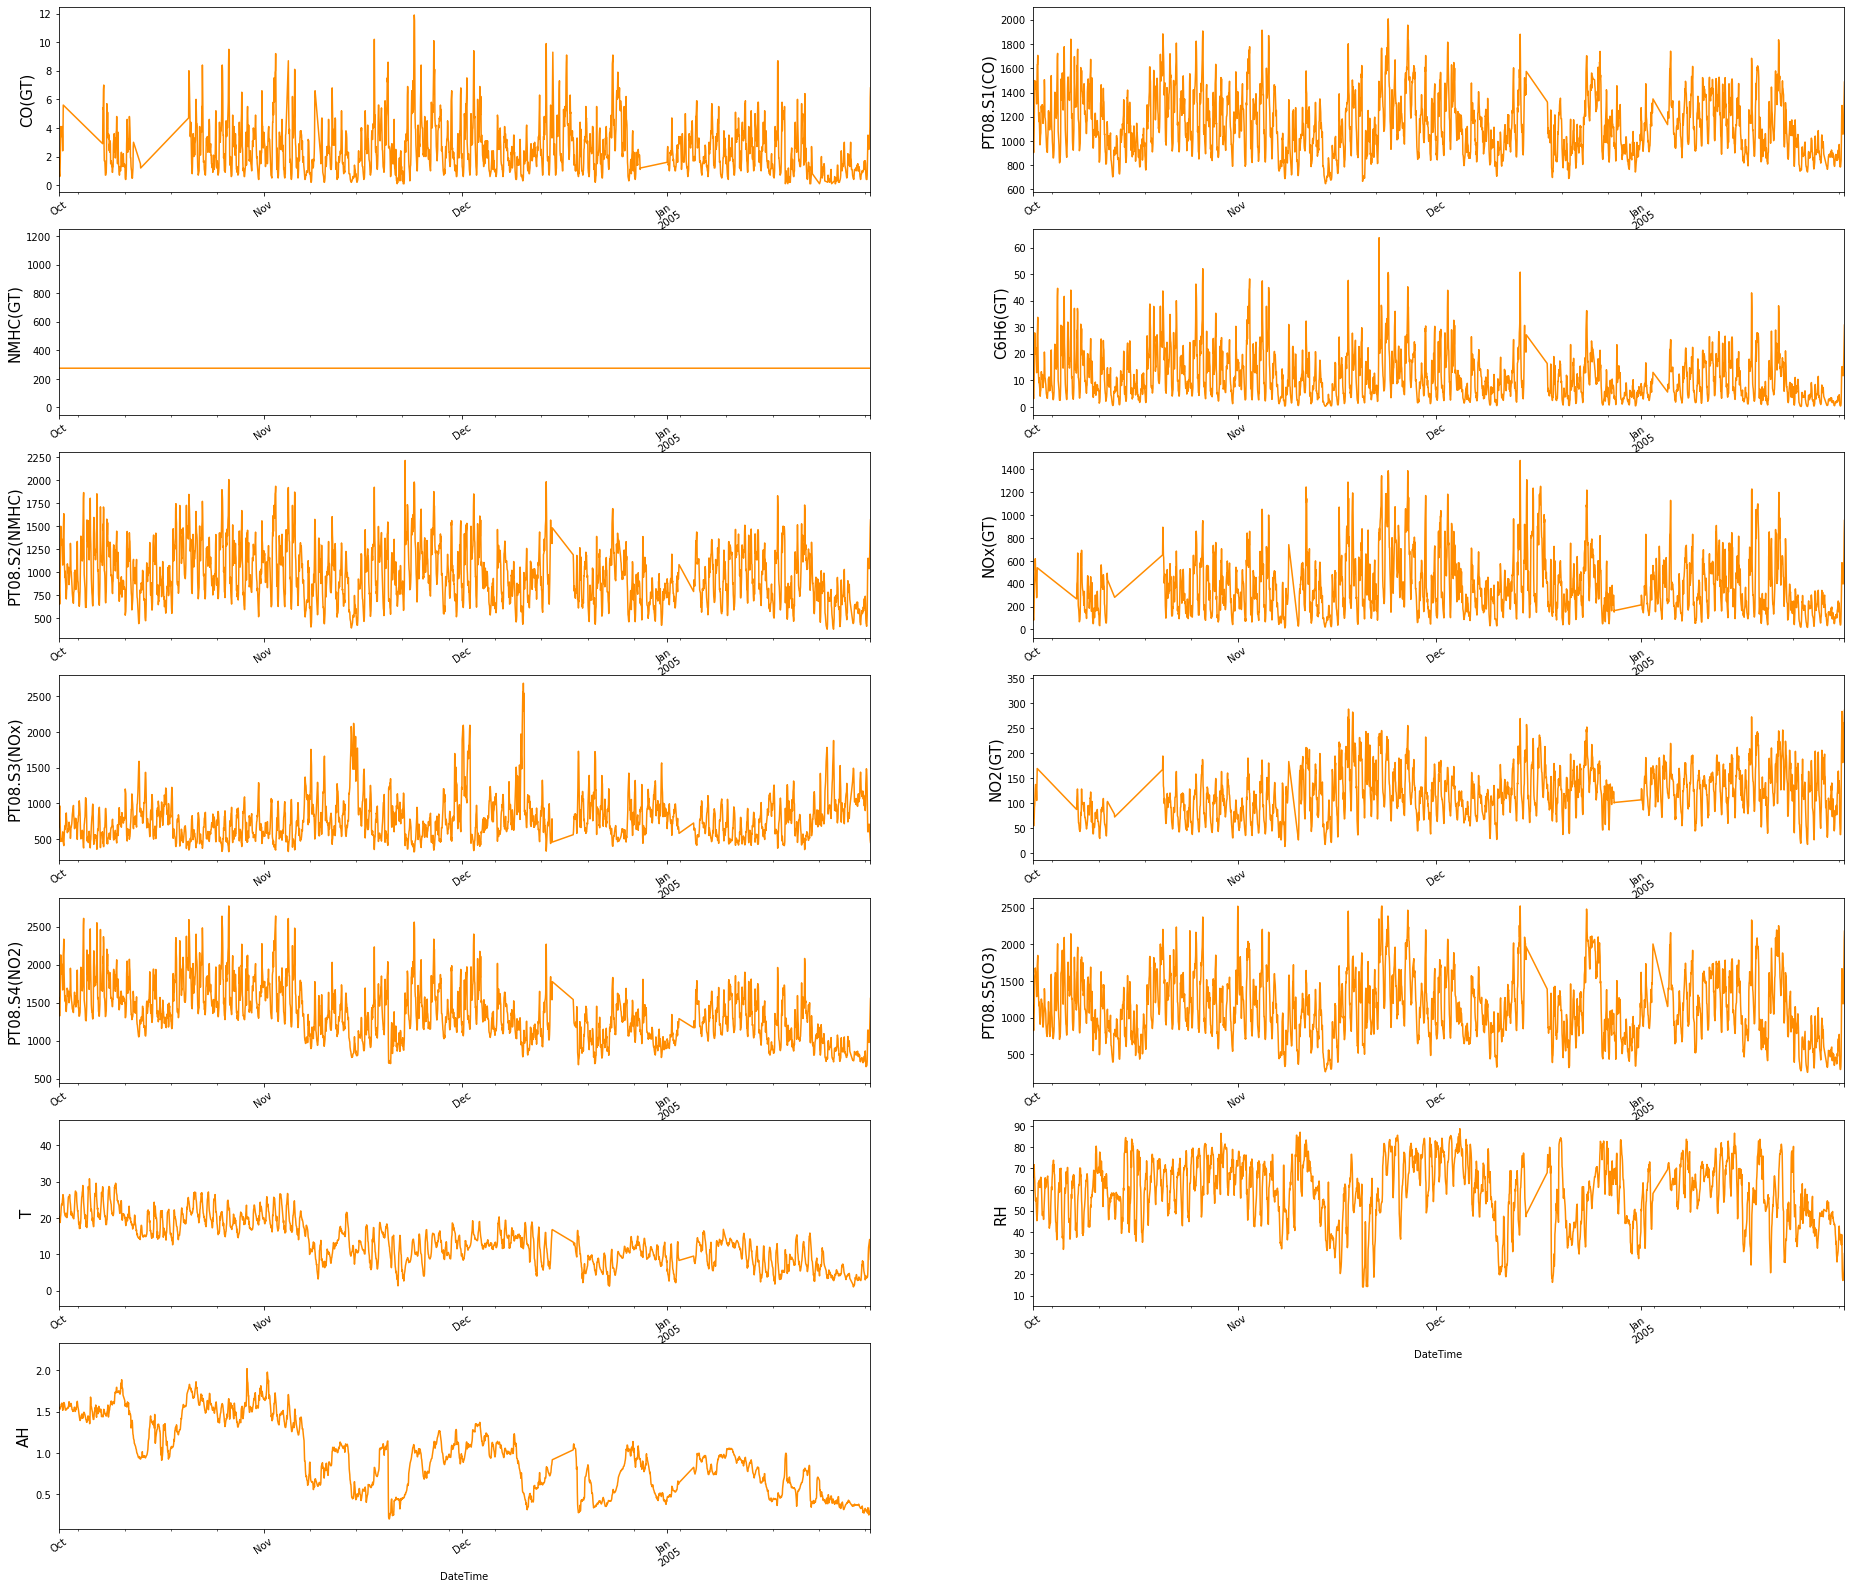

In [21]:
#Visualizing the data within 1st October,2004->31st January,2005
plt.figure(figsize=(32,28))
for i in enumerate(numeric_feat):
    plt.subplot(7,2,i[0]+1)
    co = df[i[1]]
    co.plot(xlim=['2004-10-01 00:00:00','2005-01-31 18:00:00'],color='#ff8c00')
    plt.ylabel(i[1], fontsize=15)
    plt.xticks(rotation=35)

In [22]:
#Minimum Values Month End Wise
df.resample(rule='M').min()

,DateTime,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,,,,
2004-03-31,2004-03-10 18:00:00,2004-03-10,00:00:00,0.3,817.75,7.0,0.616085,456.75,12.0,536.75,20.0,1050.25,341.250000,6.100,14.900,0.402317
2004-04-30,2004-04-01 00:00:00,2004-04-01,00:00:00,0.3,752.50,9.0,0.542781,447.50,10.0,461.25,17.0,955.00,263.000000,7.400,16.175,0.486762
2004-05-31,2004-05-01 00:00:00,2004-05-01,00:00:00,0.1,735.75,275.0,0.464418,437.00,4.0,451.50,8.0,1047.50,300.500000,7.400,9.175,0.375444
2004-06-30,2004-06-01 00:00:00,2004-06-01,00:00:00,0.1,708.00,275.0,0.464418,437.00,9.0,458.75,16.0,1227.25,333.500000,16.500,11.875,0.750229
2004-07-31,2004-07-01 00:00:00,2004-07-01,00:00:00,0.1,722.75,275.0,1.293620,526.75,10.0,409.75,17.0,1233.75,386.000000,16.250,9.600,0.715829
2004-08-31,2004-08-01 00:00:00,2004-08-01,00:00:00,0.1,710.75,275.0,0.950314,494.00,2.0,416.00,5.0,1084.00,368.250000,18.600,9.975,0.659059
2004-09-30,2004-09-01 00:00:00,2004-09-01,00:00:00,0.2,717.75,275.0,0.875741,486.25,19.0,387.50,2.0,1058.75,342.250000,11.925,13.825,0.651429
2004-10-31,2004-10-01 00:00:00,2004-10-01,00:00:00,0.4,704.00,275.0,0.516082,444.00,33.0,325.25,29.0,1049.50,391.500000,12.600,31.825,0.910680
2004-11-30,2004-11-01 00:00:00,2004-11-01,00:00:00,0.1,647.25,275.0,0.212798,396.50,13.0,322.00,13.0,697.00,261.000000,1.300,14.025,0.198757


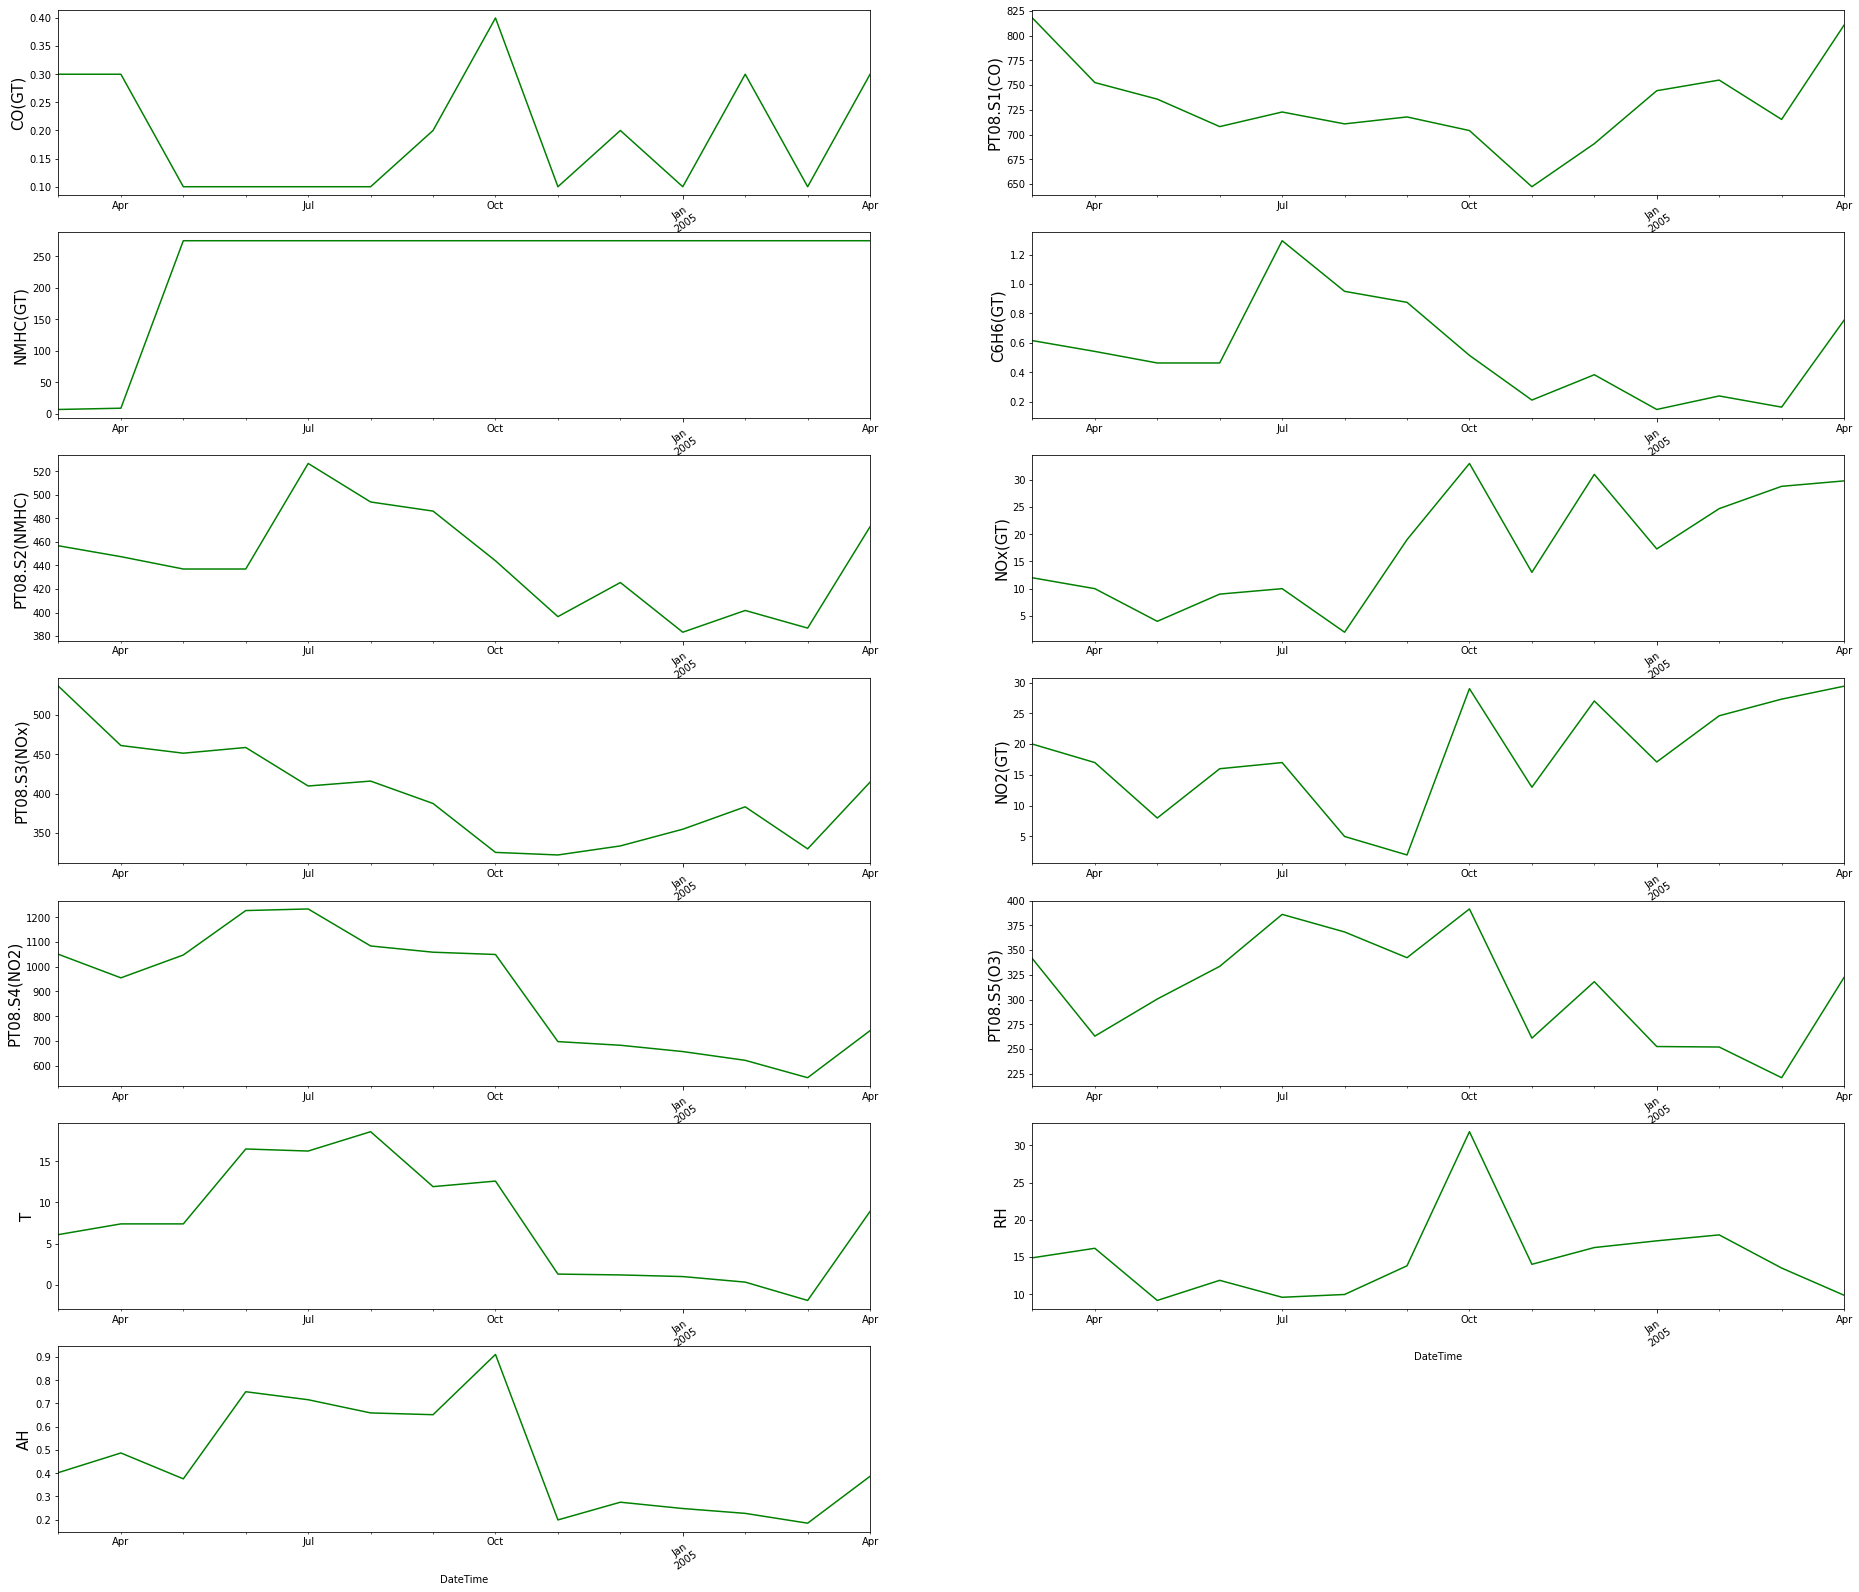

In [23]:
#Visualizing the data change
plt.figure(figsize=(32,28))
for i in enumerate(numeric_feat):
    plt.subplot(7,2,i[0]+1)
    co = df.resample(rule='M').min()[i[1]]
    co.plot(color='g')
    plt.ylabel(i[1], fontsize=15)
    plt.xticks(rotation=35)

In [24]:
#Maximum Values Month End Wise
df.resample(rule='M').max()

,DateTime,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,,,,
2004-03-31,2004-03-31 23:00:00,2004-03-31,23:00:00,8.1,2039.75,797.0,39.202340,1754.25,478.0,1934.50,194.0,2679.00,2358.50,29.275000,83.224998,1.094518
2004-04-30,2004-04-30 23:00:00,2004-04-30,23:00:00,7.3,1874.50,1189.0,40.260061,1776.25,378.0,1923.25,196.0,2684.00,2108.25,31.275000,82.400000,1.485238
2004-05-31,2004-05-31 23:00:00,2004-05-31,23:00:00,6.5,1762.75,275.0,40.223805,1775.50,383.0,1903.75,179.0,2666.50,2053.75,32.775001,85.150002,1.629648
2004-06-30,2004-06-30 23:00:00,2004-06-30,23:00:00,6.4,1505.50,275.0,36.878165,1705.00,441.0,1940.75,226.0,2746.00,2201.50,42.200000,82.250000,1.938953
2004-07-31,2004-07-31 23:00:00,2004-07-31,23:00:00,5.3,1625.75,275.0,37.251572,1713.00,427.0,1274.00,233.0,2662.00,2474.75,44.600000,69.324999,2.004190
2004-08-31,2004-08-31 23:00:00,2004-08-31,23:00:00,3.5,1392.50,275.0,30.670093,1566.50,282.0,1398.00,185.0,2403.75,1606.75,40.525000,81.824999,2.180639
2004-09-30,2004-09-30 23:00:00,2004-09-30,23:00:00,7.5,1728.00,275.0,41.170987,1795.00,891.0,1531.25,225.0,2555.00,2321.00,40.700000,87.174999,2.231036
2004-10-31,2004-10-31 23:00:00,2004-10-31,23:00:00,9.5,1907.75,275.0,52.054064,2006.75,952.0,1590.00,194.0,2775.00,2372.00,30.800000,86.525002,2.022386
2004-11-30,2004-11-30 23:00:00,2004-11-30,23:00:00,11.9,2007.75,275.0,63.741476,2214.00,1389.0,2121.25,288.0,2643.00,2522.25,26.750000,87.074999,1.980013


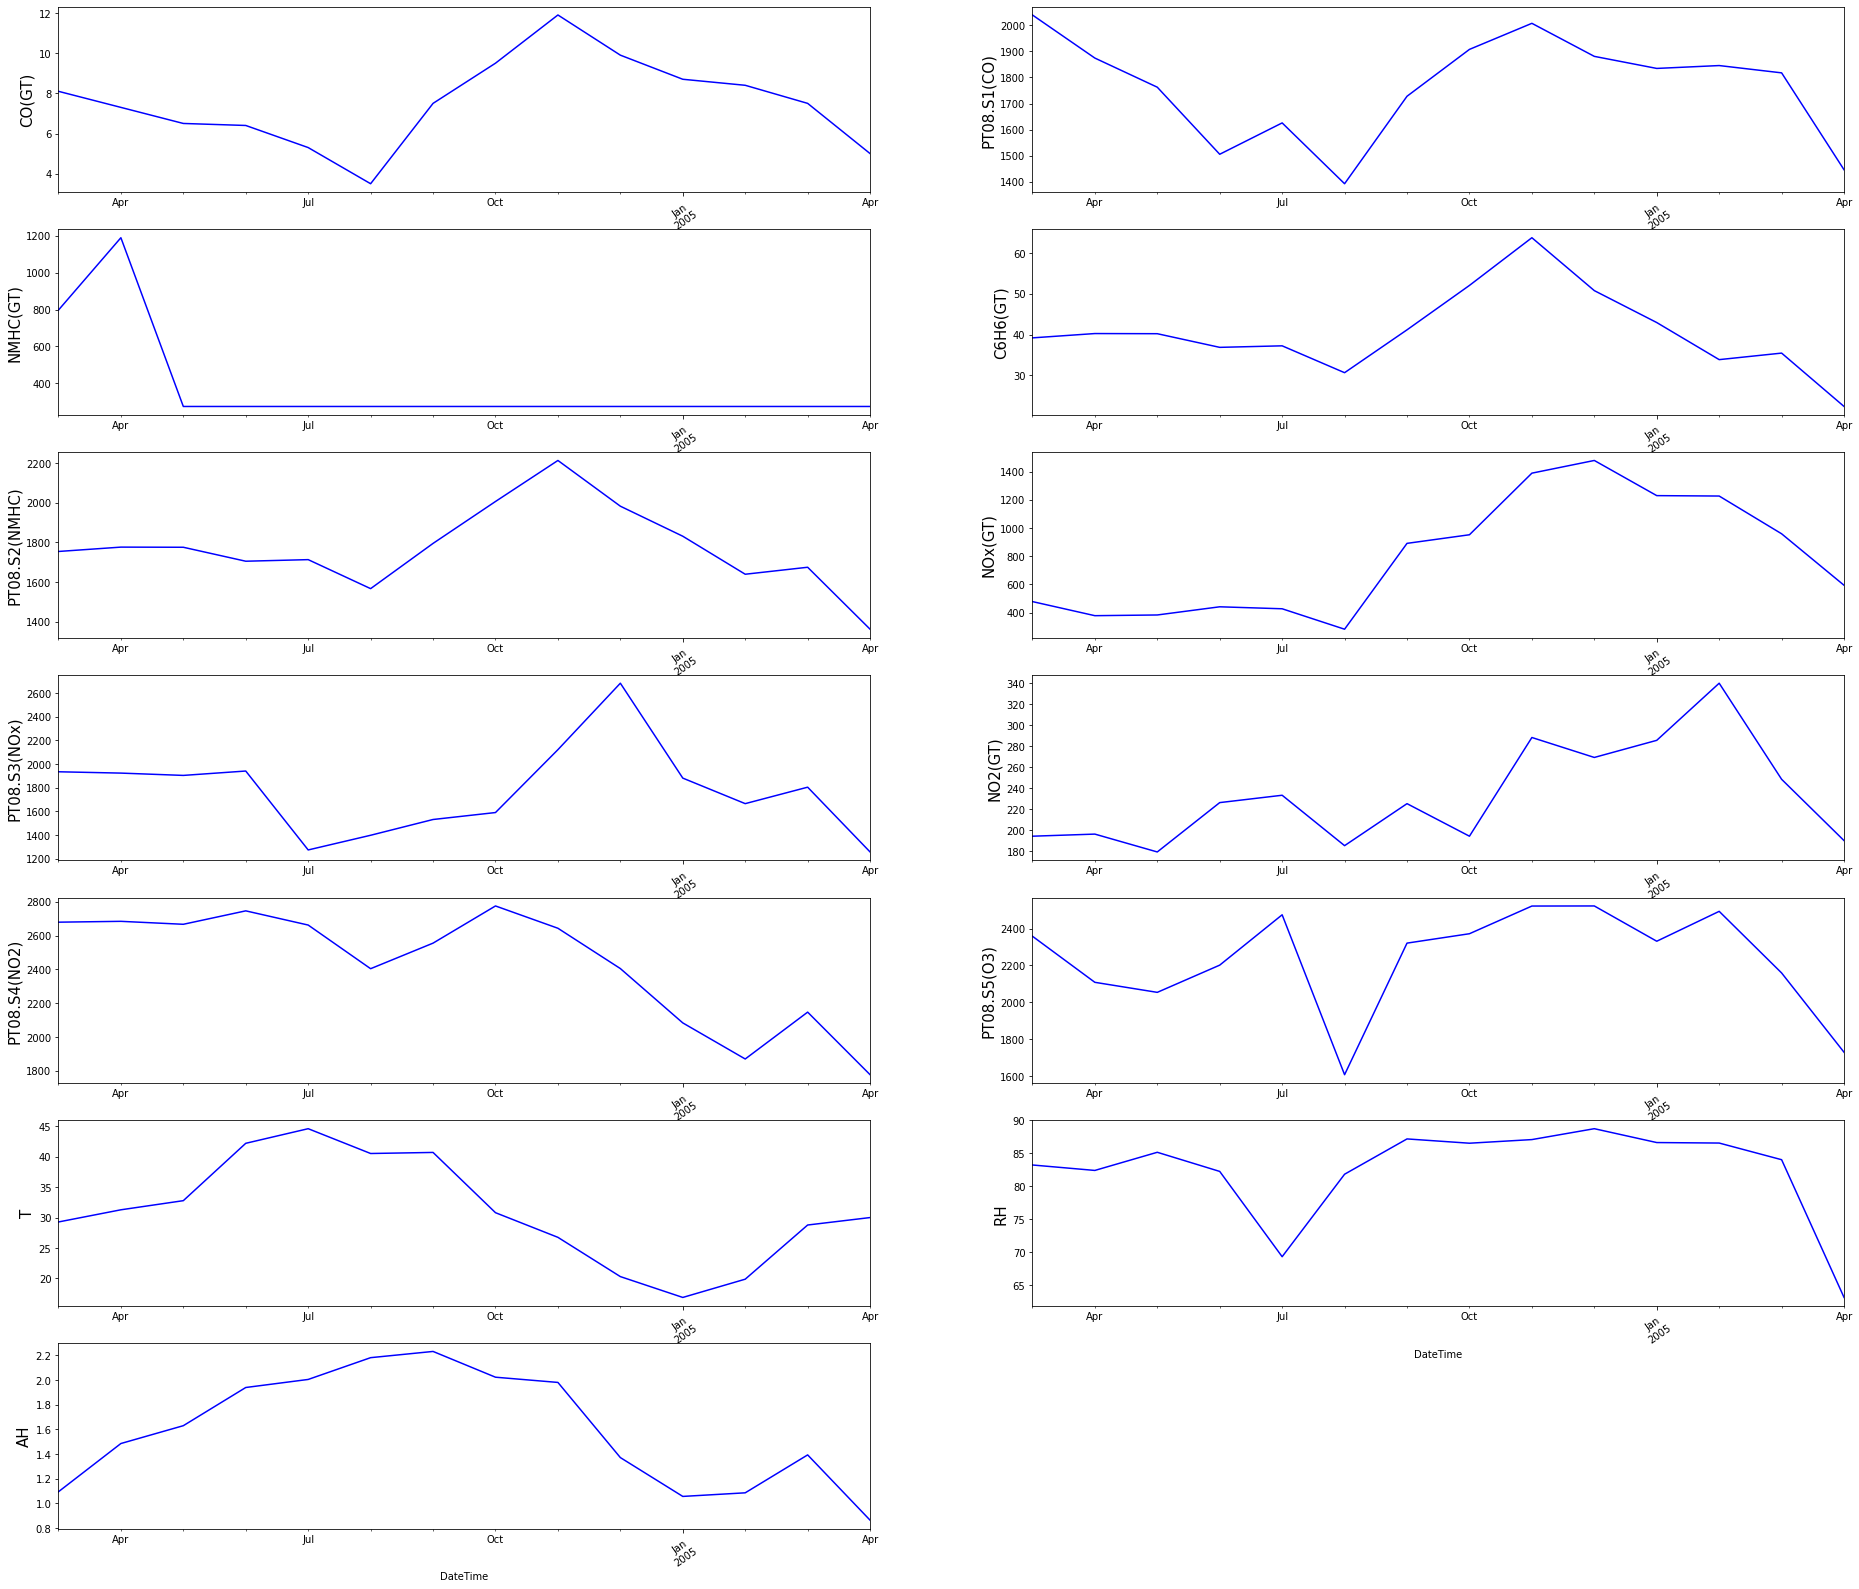

In [25]:
#Visualizing the data change
plt.figure(figsize=(32,28))
for i in enumerate(numeric_feat):
    plt.subplot(7,2,i[0]+1)
    co = df.resample(rule='M').max()[i[1]]
    co.plot(color='b')
    plt.ylabel(i[1], fontsize=15)
    plt.xticks(rotation=35)

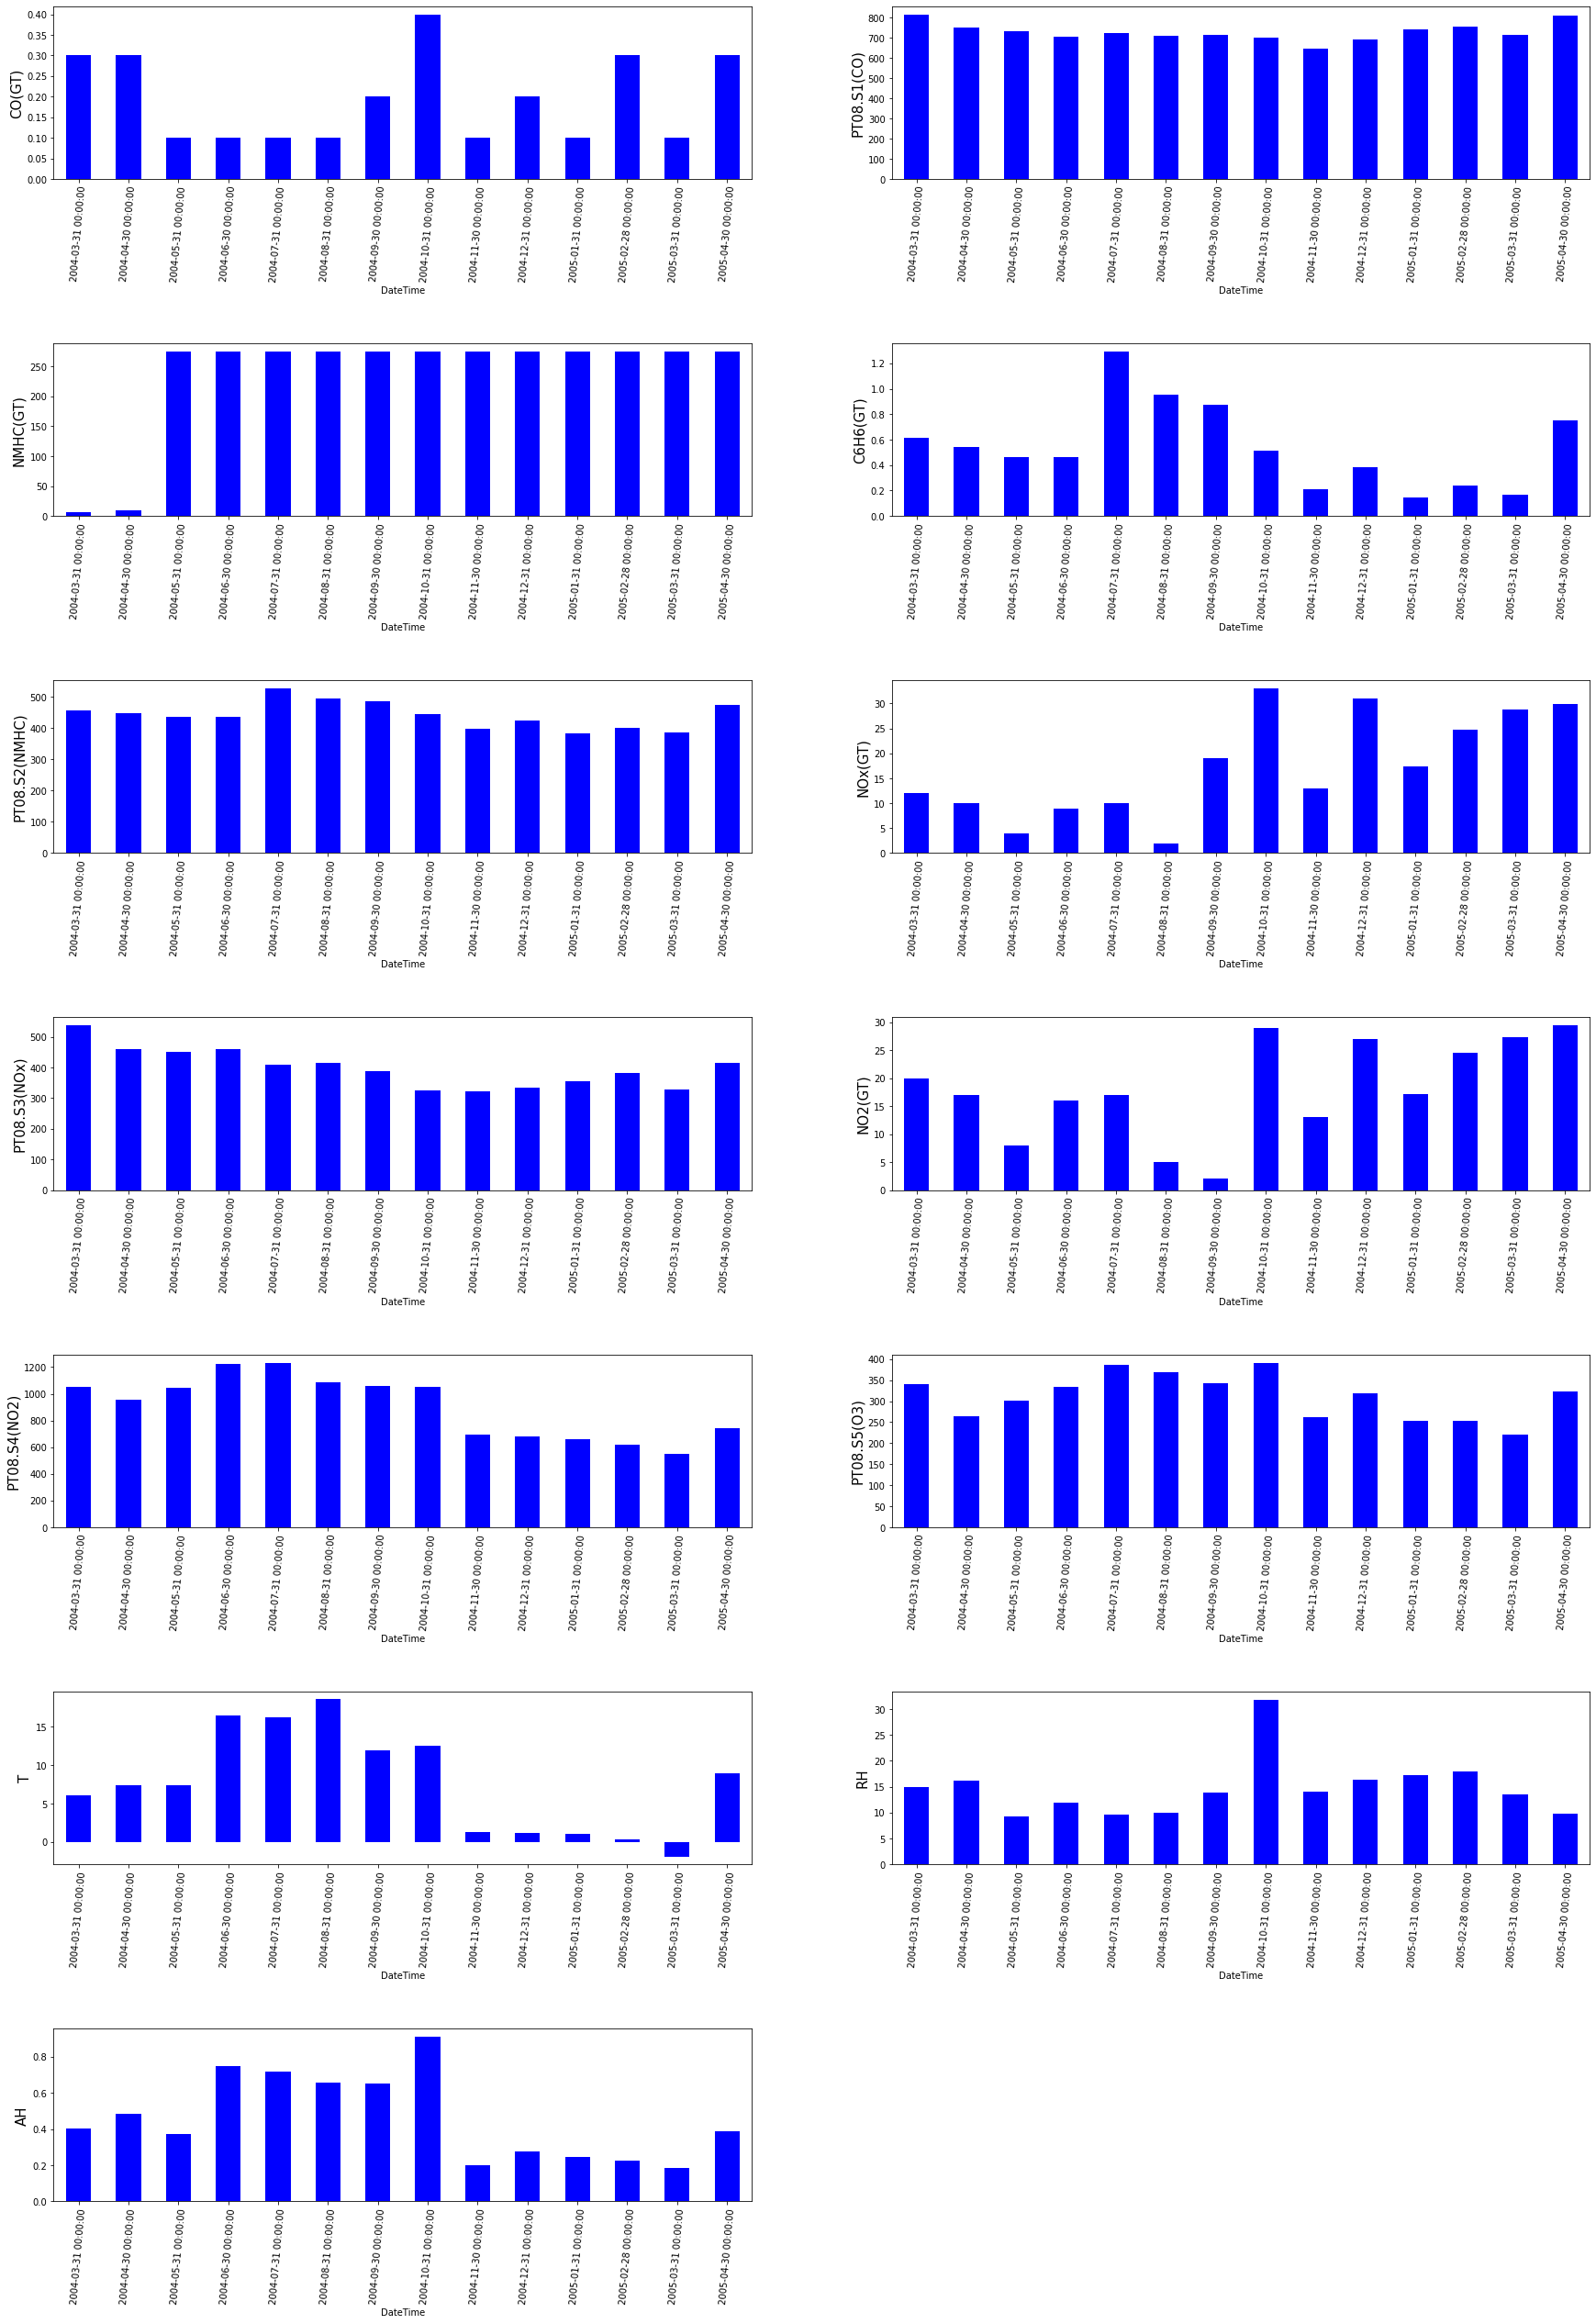

In [26]:
#Visualizing the min monthly data change in bar plot
plt.figure(figsize=(30,44))
for i in enumerate(numeric_feat):
    plt.subplot(7,2,i[0]+1)
    co = df.resample(rule='M').min()[i[1]]
    co.plot(kind='bar',color='b')
    plt.subplots_adjust(hspace=0.95)                  
    plt.ylabel(i[1], fontsize=15)
    plt.xticks(rotation=85)

In [27]:
#Converting the forecasting model to a supervised learning problem
#Doing univariate Prediction of 'RH'

In [28]:
predfeature = df['RH'] 

In [29]:
#Dividing into data and label
def prepare_dataset(df, window_size=4):
    dfnp = df.to_numpy()
    X_data= []
    y_label = []
    for i in range(len(dfnp)-window_size):
        row = [[a] for a in dfnp[i:i+window_size]]
        X_data.append(row)
        label = dfnp[i+window_size]
        y_label.append(label)
    
    return np.array(X_data), np.array(y_label)

In [30]:
WINDOW_SIZE = 4
X, y = prepare_dataset(predfeature, WINDOW_SIZE)
print(f'Train Data Shape: ', X.shape)
print(f'Test Data Shape: ', y.shape)

Train Data Shape:  (9353, 4, 1)
Test Data Shape:  (9353,)


In [31]:
#Diving the data sequentially into train,validation and test set
X_train, y_train = X[:5900], y[:5900]
X_val, y_val = X[5900:8400], y[5900:8400]
X_test, y_test = X[8400:], y[8400:]
print(f'Train Size:',X_train.shape, y_train.shape)
print(f'Validation Size:',X_val.shape, y_val.shape)
print(f'Test Size:',X_test.shape, y_test.shape)

Train Size: (5900, 4, 1) (5900,)
Validation Size: (2500, 4, 1) (2500,)
Test Size: (953, 4, 1) (953,)


In [32]:
#DATA PREPROCESSING
no2_mean = np.mean(X_train[:, :, 0])
no2_std = np.std(X_train[:, :, 0])
                           
def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - no2_mean) / no2_std
    return X

In [33]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

array([[[ 1.94834813],
        [ 1.92746622],
        [ 1.90210959],
        [ 1.99458644]],

       [[ 1.92746622],
        [ 1.90210959],
        [ 1.99458644],
        [ 1.94387339]],

       [[ 1.90210959],
        [ 1.99458644],
        [ 1.94387339],
        [ 1.88271934]],

       ...,

       [[ 0.1525064 ],
        [-0.59924125],
        [-1.01837045],
        [-1.34800585]],

       [[-0.59924125],
        [-1.01837045],
        [-1.34800585],
        [-1.66869188]],

       [[-1.01837045],
        [-1.34800585],
        [-1.66869188],
        [-1.95507194]]])

In [34]:
model = Sequential()
model.add(InputLayer((4, 1)))
model.add(LSTM(64,activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(128, 'relu'))
model.add(Dropout(0.35))
model.add(Dense(64, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 33,537
Trainable params: 33,537
Non-traina

In [35]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.000125), metrics=[RootMeanSquaredError()])

In [36]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp1])

Epoch 1/100
180/185 [============================>.] - ETA: 0s - loss: 2368.4458 - root_mean_squared_error: 48.6667INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 7s 21ms/step - loss: 2360.8496 - root_mean_squared_error: 48.5886 - val_loss: 2892.5361 - val_root_mean_squared_error: 53.7823
Epoch 2/100
183/185 [============================>.] - ETA: 0s - loss: 854.8058 - root_mean_squared_error: 29.2371INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 5s 25ms/step - loss: 850.6848 - root_mean_squared_error: 29.1665 - val_loss: 307.9145 - val_root_mean_squared_error: 17.5475
Epoch 3/100
183/185 [============================>.] - ETA: 0s - loss: 224.0760 - root_mean_squared_error: 14.9692INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 4s 22ms/step - loss: 223.5520 - root_mean_squared_error: 14.9517 - val_loss: 143.4116 - val_root_mean_squared_error: 11.9755
Epoch 4/100
183/185 [============================>.] - ETA: 0s - loss: 155.9335 - root_mean_squared_error: 12.4873INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 3s 18ms/step - loss: 155.8904 - root_mean_squared_error: 12.4856 - val_loss: 92.5453 - val_root_mean_squared_error: 9.6200
Epoch 5/100
179/185 [============================>.] - ETA: 0s - loss: 129.5395 - root_mean_squared_error: 11.3815INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 3s 18ms/step - loss: 129.8990 - root_mean_squared_error: 11.3973 - val_loss: 72.3750 - val_root_mean_squared_error: 8.5073
Epoch 6/100
185/185 [==============================] - ETA: 0s - loss: 116.8464 - root_mean_squared_error: 10.8096INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 4s 21ms/step - loss: 116.8464 - root_mean_squared_error: 10.8096 - val_loss: 59.2535 - val_root_mean_squared_error: 7.6976
Epoch 7/100
180/185 [============================>.] - ETA: 0s - loss: 105.2877 - root_mean_squared_error: 10.2610INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 4s 21ms/step - loss: 104.9605 - root_mean_squared_error: 10.2450 - val_loss: 53.3668 - val_root_mean_squared_error: 7.3053
Epoch 8/100
185/185 [==============================] - ETA: 0s - loss: 100.0525 - root_mean_squared_error: 10.0026INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 4s 23ms/step - loss: 100.0525 - root_mean_squared_error: 10.0026 - val_loss: 46.4582 - val_root_mean_squared_error: 6.8160
Epoch 9/100
185/185 [==============================] - ETA: 0s - loss: 92.0824 - root_mean_squared_error: 9.5960INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 4s 19ms/step - loss: 92.0824 - root_mean_squared_error: 9.5960 - val_loss: 45.6396 - val_root_mean_squared_error: 6.7557
Epoch 10/100
182/185 [============================>.] - ETA: 0s - loss: 83.7799 - root_mean_squared_error: 9.1531INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 3s 18ms/step - loss: 83.5144 - root_mean_squared_error: 9.1386 - val_loss: 36.8728 - val_root_mean_squared_error: 6.0723
Epoch 11/100
183/185 [============================>.] - ETA: 0s - loss: 83.2618 - root_mean_squared_error: 9.1248INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 4s 20ms/step - loss: 83.0048 - root_mean_squared_error: 9.1107 - val_loss: 36.7190 - val_root_mean_squared_error: 6.0596
Epoch 12/100
183/185 [============================>.] - ETA: 0s - loss: 78.9880 - root_mean_squared_error: 8.8875INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 3s 18ms/step - loss: 79.0066 - root_mean_squared_error: 8.8886 - val_loss: 31.2710 - val_root_mean_squared_error: 5.5920
Epoch 13/100
185/185 [==============================] - 2s 9ms/step - loss: 73.3142 - root_mean_squared_error: 8.5624 - val_loss: 31.6845 - val_root_mean_squared_error: 5.6289
Epoch 14/100
185/185 [==============================] - 2s 9ms/step - loss: 71.0339 - root_mean_squared_error: 8.4282 - val_loss: 38.8701 - val_root_mean_squared_error: 6.2346
Epoch 15/100
183/185 [============================>.] - ETA: 0s - loss: 69.5357 - root_mean_squared_error: 8.3388INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 3s 19ms/step - loss: 69.3500 - root_mean_squared_error: 8.3277 - val_loss: 29.0355 - val_root_mean_squared_error: 5.3885
Epoch 16/100
179/185 [============================>.] - ETA: 0s - loss: 66.8021 - root_mean_squared_error: 8.1733INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 4s 21ms/step - loss: 66.8675 - root_mean_squared_error: 8.1773 - val_loss: 28.3699 - val_root_mean_squared_error: 5.3263
Epoch 17/100
185/185 [==============================] - 2s 10ms/step - loss: 66.8895 - root_mean_squared_error: 8.1786 - val_loss: 31.3996 - val_root_mean_squared_error: 5.6035
Epoch 18/100
182/185 [============================>.] - ETA: 0s - loss: 63.8387 - root_mean_squared_error: 7.9899INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 4s 20ms/step - loss: 63.9734 - root_mean_squared_error: 7.9983 - val_loss: 24.7139 - val_root_mean_squared_error: 4.9713
Epoch 19/100
184/185 [============================>.] - ETA: 0s - loss: 61.1728 - root_mean_squared_error: 7.8213INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 4s 20ms/step - loss: 61.1097 - root_mean_squared_error: 7.8173 - val_loss: 23.5135 - val_root_mean_squared_error: 4.8491
Epoch 20/100
181/185 [============================>.] - ETA: 0s - loss: 61.7579 - root_mean_squared_error: 7.8586INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 4s 20ms/step - loss: 62.0723 - root_mean_squared_error: 7.8786 - val_loss: 23.4202 - val_root_mean_squared_error: 4.8394
Epoch 21/100
185/185 [==============================] - 2s 9ms/step - loss: 60.4966 - root_mean_squared_error: 7.7780 - val_loss: 26.0629 - val_root_mean_squared_error: 5.1052
Epoch 22/100
185/185 [==============================] - 2s 9ms/step - loss: 57.8093 - root_mean_squared_error: 7.6032 - val_loss: 25.6842 - val_root_mean_squared_error: 5.0680
Epoch 23/100
183/185 [============================>.] - ETA: 0s - loss: 57.3954 - root_mean_squared_error: 7.5760INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 3s 18ms/step - loss: 57.4277 - root_mean_squared_error: 7.5781 - val_loss: 20.9171 - val_root_mean_squared_error: 4.5735
Epoch 24/100
185/185 [==============================] - 2s 9ms/step - loss: 56.1435 - root_mean_squared_error: 7.4929 - val_loss: 26.4495 - val_root_mean_squared_error: 5.1429
Epoch 25/100
185/185 [==============================] - 2s 9ms/step - loss: 55.3194 - root_mean_squared_error: 7.4377 - val_loss: 24.2754 - val_root_mean_squared_error: 4.9270
Epoch 26/100
185/185 [==============================] - 2s 9ms/step - loss: 53.7616 - root_mean_squared_error: 7.3322 - val_loss: 22.3709 - val_root_mean_squared_error: 4.7298
Epoch 27/100
182/185 [============================>.] - ETA: 0s - loss: 53.4338 - root_mean_squared_error: 7.3098INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 4s 19ms/step - loss: 53.3143 - root_mean_squared_error: 7.3017 - val_loss: 20.3487 - val_root_mean_squared_error: 4.5110
Epoch 28/100
182/185 [============================>.] - ETA: 0s - loss: 53.7115 - root_mean_squared_error: 7.3288INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 3s 18ms/step - loss: 53.6170 - root_mean_squared_error: 7.3224 - val_loss: 20.0467 - val_root_mean_squared_error: 4.4774
Epoch 29/100
185/185 [==============================] - 2s 9ms/step - loss: 52.2568 - root_mean_squared_error: 7.2289 - val_loss: 23.9552 - val_root_mean_squared_error: 4.8944
Epoch 30/100
185/185 [==============================] - 2s 9ms/step - loss: 52.9753 - root_mean_squared_error: 7.2784 - val_loss: 22.4427 - val_root_mean_squared_error: 4.7374
Epoch 31/100
185/185 [==============================] - 2s 9ms/step - loss: 50.6495 - root_mean_squared_error: 7.1168 - val_loss: 23.6665 - val_root_mean_squared_error: 4.8648
Epoch 32/100
185/185 [==============================] - 2s 9ms/step - loss: 49.8446 - root_mean_squared_error: 7.0601 - val_loss: 21.0086 - val_root_mean_squared_error: 4.5835
Epoch 33/100
180/185 [============================>.] - ETA: 0s - loss: 50.3527 - root_mean_squared_error: 7.0960INFO:tensorflow:Ass

INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 4s 20ms/step - loss: 50.2528 - root_mean_squared_error: 7.0889 - val_loss: 17.5027 - val_root_mean_squared_error: 4.1836
Epoch 34/100
185/185 [==============================] - 2s 9ms/step - loss: 48.8472 - root_mean_squared_error: 6.9891 - val_loss: 17.8286 - val_root_mean_squared_error: 4.2224
Epoch 35/100
185/185 [==============================] - 2s 9ms/step - loss: 47.2394 - root_mean_squared_error: 6.8731 - val_loss: 21.3659 - val_root_mean_squared_error: 4.6223
Epoch 36/100
185/185 [==============================] - 2s 9ms/step - loss: 47.2726 - root_mean_squared_error: 6.8755 - val_loss: 21.3363 - val_root_mean_squared_error: 4.6191
Epoch 37/100
185/185 [==============================] - 2s 9ms/step - loss: 46.5366 - root_mean_squared_error: 6.8218 - val_loss: 23.7562 - val_root_mean_squared_error: 4.8740
Epoch 38/100
185/185 [==============================] - 2s 9ms/step - loss: 46.3946 - root_mean_squared_error: 6.8114 - val_loss: 19

INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 4s 20ms/step - loss: 43.0422 - root_mean_squared_error: 6.5607 - val_loss: 16.6357 - val_root_mean_squared_error: 4.0787
Epoch 46/100
185/185 [==============================] - 2s 9ms/step - loss: 44.3050 - root_mean_squared_error: 6.6562 - val_loss: 17.2624 - val_root_mean_squared_error: 4.1548
Epoch 47/100
185/185 [==============================] - 2s 9ms/step - loss: 42.6569 - root_mean_squared_error: 6.5312 - val_loss: 17.9515 - val_root_mean_squared_error: 4.2369
Epoch 48/100
185/185 [==============================] - 2s 9ms/step - loss: 41.1058 - root_mean_squared_error: 6.4114 - val_loss: 17.9991 - val_root_mean_squared_error: 4.2425
Epoch 49/100
185/185 [==============================] - ETA: 0s - loss: 42.2495 - root_mean_squared_error: 6.5000INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 3s 18ms/step - loss: 42.2495 - root_mean_squared_error: 6.5000 - val_loss: 16.2863 - val_root_mean_squared_error: 4.0356
Epoch 50/100
185/185 [==============================] - 2s 9ms/step - loss: 41.7582 - root_mean_squared_error: 6.4621 - val_loss: 16.6208 - val_root_mean_squared_error: 4.0769
Epoch 51/100
185/185 [==============================] - 2s 10ms/step - loss: 42.2437 - root_mean_squared_error: 6.4995 - val_loss: 17.6843 - val_root_mean_squared_error: 4.2053
Epoch 52/100
181/185 [============================>.] - ETA: 0s - loss: 40.4952 - root_mean_squared_error: 6.3636INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 3s 18ms/step - loss: 40.3029 - root_mean_squared_error: 6.3485 - val_loss: 15.0263 - val_root_mean_squared_error: 3.8764
Epoch 53/100
185/185 [==============================] - 2s 9ms/step - loss: 40.1353 - root_mean_squared_error: 6.3352 - val_loss: 15.4355 - val_root_mean_squared_error: 3.9288
Epoch 54/100
185/185 [==============================] - 2s 9ms/step - loss: 39.5913 - root_mean_squared_error: 6.2922 - val_loss: 15.7155 - val_root_mean_squared_error: 3.9643
Epoch 55/100
185/185 [==============================] - 2s 10ms/step - loss: 39.4626 - root_mean_squared_error: 6.2819 - val_loss: 17.0135 - val_root_mean_squared_error: 4.1247
Epoch 56/100
185/185 [==============================] - 2s 11ms/step - loss: 40.4159 - root_mean_squared_error: 6.3573 - val_loss: 15.0528 - val_root_mean_squared_error: 3.8798
Epoch 57/100
179/185 [============================>.] - ETA: 0s - loss: 40.7165 - root_mean_squared_error: 6.3809INFO:tensorflow:A

INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 4s 20ms/step - loss: 40.5462 - root_mean_squared_error: 6.3676 - val_loss: 14.6601 - val_root_mean_squared_error: 3.8289
Epoch 58/100
185/185 [==============================] - 2s 9ms/step - loss: 39.8503 - root_mean_squared_error: 6.3127 - val_loss: 17.0824 - val_root_mean_squared_error: 4.1331
Epoch 59/100
185/185 [==============================] - 2s 9ms/step - loss: 38.9031 - root_mean_squared_error: 6.2372 - val_loss: 14.9373 - val_root_mean_squared_error: 3.8649
Epoch 60/100
185/185 [==============================] - 2s 9ms/step - loss: 38.4353 - root_mean_squared_error: 6.1996 - val_loss: 16.7874 - val_root_mean_squared_error: 4.0972
Epoch 61/100
185/185 [==============================] - 2s 9ms/step - loss: 37.5232 - root_mean_squared_error: 6.1256 - val_loss: 16.1155 - val_root_mean_squared_error: 4.0144
Epoch 62/100
185/185 [==============================] - 2s 9ms/step - loss: 37.2499 - root_mean_squared_error: 6.1033 - val_loss: 16

INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 3s 19ms/step - loss: 37.7862 - root_mean_squared_error: 6.1470 - val_loss: 14.5880 - val_root_mean_squared_error: 3.8194
Epoch 64/100
185/185 [==============================] - 2s 9ms/step - loss: 37.3415 - root_mean_squared_error: 6.1108 - val_loss: 14.7786 - val_root_mean_squared_error: 3.8443
Epoch 65/100
185/185 [==============================] - 2s 9ms/step - loss: 38.7942 - root_mean_squared_error: 6.2285 - val_loss: 16.4905 - val_root_mean_squared_error: 4.0609
Epoch 66/100
185/185 [==============================] - 2s 9ms/step - loss: 37.3708 - root_mean_squared_error: 6.1132 - val_loss: 15.7631 - val_root_mean_squared_error: 3.9703
Epoch 67/100
185/185 [==============================] - 2s 9ms/step - loss: 37.2652 - root_mean_squared_error: 6.1045 - val_loss: 17.4215 - val_root_mean_squared_error: 4.1739
Epoch 68/100
185/185 [==============================] - 2s 9ms/step - loss: 37.7193 - root_mean_squared_error: 6.1416 - val_loss: 16

INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 4s 20ms/step - loss: 34.0300 - root_mean_squared_error: 5.8335 - val_loss: 13.9778 - val_root_mean_squared_error: 3.7387
Epoch 88/100
185/185 [==============================] - 2s 9ms/step - loss: 34.0923 - root_mean_squared_error: 5.8389 - val_loss: 16.2760 - val_root_mean_squared_error: 4.0343
Epoch 89/100
185/185 [==============================] - 2s 9ms/step - loss: 34.8981 - root_mean_squared_error: 5.9075 - val_loss: 16.6029 - val_root_mean_squared_error: 4.0747
Epoch 90/100
185/185 [==============================] - 2s 9ms/step - loss: 36.1445 - root_mean_squared_error: 6.0120 - val_loss: 14.6798 - val_root_mean_squared_error: 3.8314
Epoch 91/100
185/185 [==============================] - 2s 9ms/step - loss: 34.7860 - root_mean_squared_error: 5.8980 - val_loss: 15.9798 - val_root_mean_squared_error: 3.9975
Epoch 92/100
185/185 [==============================] - 2s 9ms/step - loss: 34.1521 - root_mean_squared_error: 5.8440 - val_loss: 15

INFO:tensorflow:Assets written to: model1/assets


185/185 [==============================] - 3s 18ms/step - loss: 33.9726 - root_mean_squared_error: 5.8286 - val_loss: 13.8970 - val_root_mean_squared_error: 3.7279
Epoch 100/100
185/185 [==============================] - 2s 9ms/step - loss: 33.7459 - root_mean_squared_error: 5.8091 - val_loss: 14.0624 - val_root_mean_squared_error: 3.7500


In [37]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [70]:
#Validation Predictions
def plot_results(X,y,model,start=0,end=300):
    predictions = model.predict(X).flatten()
    results = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    dfres1 = results['Predictions'][start:end]
    dfres2 = results['Actuals'][start:end]
    plt.plot(dfres1,color='r')
    plt.plot(dfres2,color='b')
    plt.xlabel('Prediction Number')
    plt.ylabel('Predicted Value')
    plt.legend(['Prediction','Actual'])

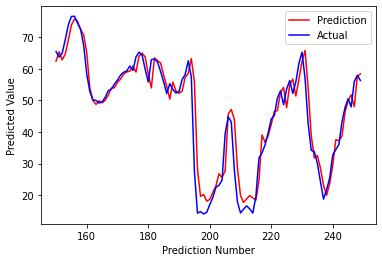

In [71]:
#Validation Results
plot_results(X_val,y_val,model1,150,250)

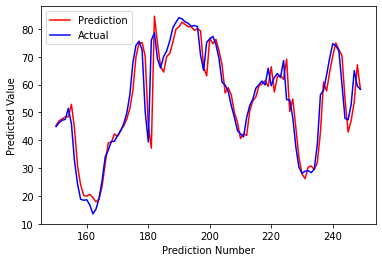

In [72]:
#Test Results
plot_results(X_test,y_test,model1,150,250)

In [54]:
model2 = Sequential()
model2.add(InputLayer((4, 1)))
model2.add(LSTM(64,activation='relu'))
model2.add(Dense(512, 'relu'))
model2.add(Dense(256, 'relu'))
model2.add(Dropout(0.25))
model2.add(Dense(64, 'relu'))
model2.add(Dense(32, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_3 (Dense)             (None, 512)               33280     
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                

In [55]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [56]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp2])

Epoch 1/100
184/185 [============================>.] - ETA: 0s - loss: 1714.3802 - root_mean_squared_error: 41.4051INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 5s 20ms/step - loss: 1711.3542 - root_mean_squared_error: 41.3685 - val_loss: 303.7361 - val_root_mean_squared_error: 17.4280
Epoch 2/100
179/185 [============================>.] - ETA: 0s - loss: 163.8385 - root_mean_squared_error: 12.7999INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 4s 20ms/step - loss: 161.6809 - root_mean_squared_error: 12.7154 - val_loss: 97.5406 - val_root_mean_squared_error: 9.8763
Epoch 3/100
182/185 [============================>.] - ETA: 0s - loss: 72.1503 - root_mean_squared_error: 8.4941INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 3s 19ms/step - loss: 71.9849 - root_mean_squared_error: 8.4844 - val_loss: 50.6667 - val_root_mean_squared_error: 7.1181
Epoch 4/100
183/185 [============================>.] - ETA: 0s - loss: 46.7649 - root_mean_squared_error: 6.8385INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 3s 19ms/step - loss: 46.6632 - root_mean_squared_error: 6.8310 - val_loss: 34.4346 - val_root_mean_squared_error: 5.8681
Epoch 5/100
182/185 [============================>.] - ETA: 0s - loss: 38.3198 - root_mean_squared_error: 6.1903INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 4s 22ms/step - loss: 38.2144 - root_mean_squared_error: 6.1818 - val_loss: 27.3502 - val_root_mean_squared_error: 5.2297
Epoch 6/100
183/185 [============================>.] - ETA: 0s - loss: 33.0156 - root_mean_squared_error: 5.7459INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 3s 19ms/step - loss: 33.0021 - root_mean_squared_error: 5.7447 - val_loss: 23.9232 - val_root_mean_squared_error: 4.8911
Epoch 7/100
180/185 [============================>.] - ETA: 0s - loss: 30.5879 - root_mean_squared_error: 5.5306INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 4s 22ms/step - loss: 30.5616 - root_mean_squared_error: 5.5283 - val_loss: 22.3120 - val_root_mean_squared_error: 4.7236
Epoch 8/100
179/185 [============================>.] - ETA: 0s - loss: 28.4830 - root_mean_squared_error: 5.3369INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 4s 23ms/step - loss: 28.3457 - root_mean_squared_error: 5.3241 - val_loss: 19.1282 - val_root_mean_squared_error: 4.3736
Epoch 9/100
182/185 [============================>.] - ETA: 0s - loss: 27.6366 - root_mean_squared_error: 5.2571INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 4s 22ms/step - loss: 27.6146 - root_mean_squared_error: 5.2550 - val_loss: 18.5477 - val_root_mean_squared_error: 4.3067
Epoch 10/100
185/185 [==============================] - ETA: 0s - loss: 26.1572 - root_mean_squared_error: 5.1144INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 4s 21ms/step - loss: 26.1572 - root_mean_squared_error: 5.1144 - val_loss: 17.5565 - val_root_mean_squared_error: 4.1900
Epoch 11/100
185/185 [==============================] - 2s 9ms/step - loss: 25.4913 - root_mean_squared_error: 5.0489 - val_loss: 19.4927 - val_root_mean_squared_error: 4.4151
Epoch 12/100
185/185 [==============================] - 2s 9ms/step - loss: 24.9200 - root_mean_squared_error: 4.9920 - val_loss: 19.5694 - val_root_mean_squared_error: 4.4237
Epoch 13/100
182/185 [============================>.] - ETA: 0s - loss: 24.7303 - root_mean_squared_error: 4.9730INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 4s 23ms/step - loss: 24.7514 - root_mean_squared_error: 4.9751 - val_loss: 16.2488 - val_root_mean_squared_error: 4.0310
Epoch 14/100
183/185 [============================>.] - ETA: 0s - loss: 24.3459 - root_mean_squared_error: 4.9342INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 4s 21ms/step - loss: 24.5072 - root_mean_squared_error: 4.9505 - val_loss: 15.7518 - val_root_mean_squared_error: 3.9688
Epoch 15/100
185/185 [==============================] - 2s 10ms/step - loss: 24.5425 - root_mean_squared_error: 4.9540 - val_loss: 17.4807 - val_root_mean_squared_error: 4.1810
Epoch 16/100
184/185 [============================>.] - ETA: 0s - loss: 24.1134 - root_mean_squared_error: 4.9105INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 4s 21ms/step - loss: 24.0931 - root_mean_squared_error: 4.9085 - val_loss: 15.3954 - val_root_mean_squared_error: 3.9237
Epoch 17/100
185/185 [==============================] - 2s 10ms/step - loss: 24.4458 - root_mean_squared_error: 4.9443 - val_loss: 17.7763 - val_root_mean_squared_error: 4.2162
Epoch 18/100
181/185 [============================>.] - ETA: 0s - loss: 24.6031 - root_mean_squared_error: 4.9602INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 4s 21ms/step - loss: 24.5494 - root_mean_squared_error: 4.9547 - val_loss: 14.5685 - val_root_mean_squared_error: 3.8169
Epoch 19/100
185/185 [==============================] - 2s 11ms/step - loss: 24.1597 - root_mean_squared_error: 4.9153 - val_loss: 15.8089 - val_root_mean_squared_error: 3.9760
Epoch 20/100
185/185 [==============================] - 2s 10ms/step - loss: 24.0688 - root_mean_squared_error: 4.9060 - val_loss: 15.4812 - val_root_mean_squared_error: 3.9346
Epoch 21/100
185/185 [==============================] - 2s 9ms/step - loss: 24.1131 - root_mean_squared_error: 4.9105 - val_loss: 14.7069 - val_root_mean_squared_error: 3.8350
Epoch 22/100
185/185 [==============================] - 2s 10ms/step - loss: 23.7590 - root_mean_squared_error: 4.8743 - val_loss: 14.7776 - val_root_mean_squared_error: 3.8442
Epoch 23/100
182/185 [============================>.] - ETA: 0s - loss: 23.7127 - root_mean_squared_error: 4.8696INFO:tensorflow:

INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 4s 24ms/step - loss: 23.6769 - root_mean_squared_error: 4.8659 - val_loss: 14.4400 - val_root_mean_squared_error: 3.8000
Epoch 24/100
185/185 [==============================] - 2s 12ms/step - loss: 23.3572 - root_mean_squared_error: 4.8329 - val_loss: 15.5301 - val_root_mean_squared_error: 3.9408
Epoch 25/100
185/185 [==============================] - 2s 11ms/step - loss: 24.1140 - root_mean_squared_error: 4.9106 - val_loss: 14.7441 - val_root_mean_squared_error: 3.8398
Epoch 26/100
185/185 [==============================] - 2s 9ms/step - loss: 24.0684 - root_mean_squared_error: 4.9060 - val_loss: 16.7159 - val_root_mean_squared_error: 4.0885
Epoch 27/100
179/185 [============================>.] - ETA: 0s - loss: 23.2738 - root_mean_squared_error: 4.8243INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 4s 19ms/step - loss: 23.1832 - root_mean_squared_error: 4.8149 - val_loss: 14.3436 - val_root_mean_squared_error: 3.7873
Epoch 28/100
185/185 [==============================] - 2s 10ms/step - loss: 23.7904 - root_mean_squared_error: 4.8775 - val_loss: 16.5220 - val_root_mean_squared_error: 4.0647
Epoch 29/100
185/185 [==============================] - ETA: 0s - loss: 23.2568 - root_mean_squared_error: 4.8225INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 4s 22ms/step - loss: 23.2568 - root_mean_squared_error: 4.8225 - val_loss: 14.0431 - val_root_mean_squared_error: 3.7474
Epoch 30/100
185/185 [==============================] - 2s 12ms/step - loss: 23.0934 - root_mean_squared_error: 4.8056 - val_loss: 14.3931 - val_root_mean_squared_error: 3.7938
Epoch 31/100
185/185 [==============================] - 2s 9ms/step - loss: 22.8815 - root_mean_squared_error: 4.7835 - val_loss: 15.1705 - val_root_mean_squared_error: 3.8949
Epoch 32/100
184/185 [============================>.] - ETA: 0s - loss: 23.3576 - root_mean_squared_error: 4.8330INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 4s 22ms/step - loss: 23.3277 - root_mean_squared_error: 4.8299 - val_loss: 13.9966 - val_root_mean_squared_error: 3.7412
Epoch 33/100
185/185 [==============================] - 2s 12ms/step - loss: 22.6333 - root_mean_squared_error: 4.7574 - val_loss: 14.4982 - val_root_mean_squared_error: 3.8077
Epoch 34/100
185/185 [==============================] - 2s 12ms/step - loss: 23.0385 - root_mean_squared_error: 4.7998 - val_loss: 17.3970 - val_root_mean_squared_error: 4.1710
Epoch 35/100
182/185 [============================>.] - ETA: 0s - loss: 24.3322 - root_mean_squared_error: 4.9328INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 4s 23ms/step - loss: 24.4237 - root_mean_squared_error: 4.9420 - val_loss: 13.9667 - val_root_mean_squared_error: 3.7372
Epoch 36/100
185/185 [==============================] - 2s 11ms/step - loss: 23.2478 - root_mean_squared_error: 4.8216 - val_loss: 14.1383 - val_root_mean_squared_error: 3.7601
Epoch 37/100
185/185 [==============================] - 2s 10ms/step - loss: 23.0478 - root_mean_squared_error: 4.8008 - val_loss: 14.8010 - val_root_mean_squared_error: 3.8472
Epoch 38/100
185/185 [==============================] - 2s 10ms/step - loss: 22.5776 - root_mean_squared_error: 4.7516 - val_loss: 14.1940 - val_root_mean_squared_error: 3.7675
Epoch 39/100
185/185 [==============================] - 2s 11ms/step - loss: 22.8564 - root_mean_squared_error: 4.7808 - val_loss: 14.2686 - val_root_mean_squared_error: 3.7774
Epoch 40/100
185/185 [==============================] - 2s 13ms/step - loss: 23.0577 - root_mean_squared_error: 4.8018 - val_los

INFO:tensorflow:Assets written to: model2/assets


185/185 [==============================] - 4s 22ms/step - loss: 22.1008 - root_mean_squared_error: 4.7011 - val_loss: 13.7846 - val_root_mean_squared_error: 3.7128
Epoch 59/100
185/185 [==============================] - 2s 10ms/step - loss: 22.5246 - root_mean_squared_error: 4.7460 - val_loss: 15.6922 - val_root_mean_squared_error: 3.9613
Epoch 60/100
185/185 [==============================] - 2s 9ms/step - loss: 23.1164 - root_mean_squared_error: 4.8080 - val_loss: 16.6847 - val_root_mean_squared_error: 4.0847
Epoch 61/100
185/185 [==============================] - 2s 9ms/step - loss: 22.6688 - root_mean_squared_error: 4.7612 - val_loss: 15.5950 - val_root_mean_squared_error: 3.9491
Epoch 62/100
185/185 [==============================] - 2s 9ms/step - loss: 22.5037 - root_mean_squared_error: 4.7438 - val_loss: 17.7597 - val_root_mean_squared_error: 4.2142
Epoch 63/100
185/185 [==============================] - 2s 9ms/step - loss: 22.0689 - root_mean_squared_error: 4.6978 - val_loss: 1

In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model('model2/')

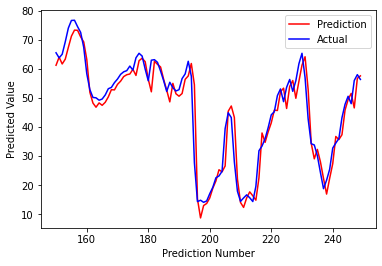

In [73]:
#Validation Predictions
plot_results(X_val,y_val,model2,150,250)

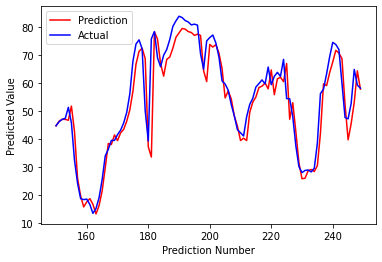

In [74]:
#Test Predictions
plot_results(X_test,y_test,model2,150,250)

In [76]:
model3 = Sequential()
model3.add(InputLayer((4, 1)))
model3.add(LSTM(64,activation='relu'))
model3.add(Dense(1024, 'relu'))
model3.add(Dense(256, 'relu'))
model3.add(Dropout(0.25))
model3.add(Dense(64, 'relu'))
model3.add(Dense(32, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dense_13 (Dense)            (None, 1024)              66560     
                                                                 
 dense_14 (Dense)            (None, 256)               262400    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                16448     
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                

In [77]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [78]:
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp3])

Epoch 1/100
181/185 [============================>.] - ETA: 0s - loss: 1656.3035 - root_mean_squared_error: 40.6977INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


185/185 [==============================] - 5s 20ms/step - loss: 1629.9485 - root_mean_squared_error: 40.3726 - val_loss: 236.6865 - val_root_mean_squared_error: 15.3846
Epoch 2/100
180/185 [============================>.] - ETA: 0s - loss: 140.5476 - root_mean_squared_error: 11.8553INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


185/185 [==============================] - 4s 19ms/step - loss: 139.2735 - root_mean_squared_error: 11.8014 - val_loss: 76.6550 - val_root_mean_squared_error: 8.7553
Epoch 3/100
181/185 [============================>.] - ETA: 0s - loss: 62.4069 - root_mean_squared_error: 7.8998INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


185/185 [==============================] - 4s 21ms/step - loss: 61.9770 - root_mean_squared_error: 7.8725 - val_loss: 40.4871 - val_root_mean_squared_error: 6.3629
Epoch 4/100
184/185 [============================>.] - ETA: 0s - loss: 43.7065 - root_mean_squared_error: 6.6111INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


185/185 [==============================] - 4s 19ms/step - loss: 43.6767 - root_mean_squared_error: 6.6088 - val_loss: 31.4425 - val_root_mean_squared_error: 5.6074
Epoch 5/100
183/185 [============================>.] - ETA: 0s - loss: 36.9229 - root_mean_squared_error: 6.0764INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


185/185 [==============================] - 4s 21ms/step - loss: 36.9658 - root_mean_squared_error: 6.0799 - val_loss: 26.8221 - val_root_mean_squared_error: 5.1790
Epoch 6/100
185/185 [==============================] - ETA: 0s - loss: 32.4252 - root_mean_squared_error: 5.6943INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


185/185 [==============================] - 4s 22ms/step - loss: 32.4252 - root_mean_squared_error: 5.6943 - val_loss: 23.6201 - val_root_mean_squared_error: 4.8600
Epoch 7/100
184/185 [============================>.] - ETA: 0s - loss: 30.6603 - root_mean_squared_error: 5.5372INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


185/185 [==============================] - 4s 20ms/step - loss: 30.6457 - root_mean_squared_error: 5.5359 - val_loss: 21.0281 - val_root_mean_squared_error: 4.5856
Epoch 8/100
182/185 [============================>.] - ETA: 0s - loss: 28.6329 - root_mean_squared_error: 5.3510INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


185/185 [==============================] - 3s 18ms/step - loss: 28.7885 - root_mean_squared_error: 5.3655 - val_loss: 18.8168 - val_root_mean_squared_error: 4.3378
Epoch 9/100
182/185 [============================>.] - ETA: 0s - loss: 28.1186 - root_mean_squared_error: 5.3027INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


185/185 [==============================] - 4s 21ms/step - loss: 27.9808 - root_mean_squared_error: 5.2897 - val_loss: 18.1504 - val_root_mean_squared_error: 4.2603
Epoch 10/100
184/185 [============================>.] - ETA: 0s - loss: 27.4418 - root_mean_squared_error: 5.2385INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


185/185 [==============================] - 3s 19ms/step - loss: 27.4424 - root_mean_squared_error: 5.2386 - val_loss: 17.2048 - val_root_mean_squared_error: 4.1479
Epoch 11/100
185/185 [==============================] - 2s 9ms/step - loss: 26.5285 - root_mean_squared_error: 5.1506 - val_loss: 19.3072 - val_root_mean_squared_error: 4.3940
Epoch 12/100
180/185 [============================>.] - ETA: 0s - loss: 25.8354 - root_mean_squared_error: 5.0828INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


185/185 [==============================] - 3s 19ms/step - loss: 26.0209 - root_mean_squared_error: 5.1011 - val_loss: 16.6776 - val_root_mean_squared_error: 4.0838
Epoch 13/100
185/185 [==============================] - 2s 9ms/step - loss: 25.7044 - root_mean_squared_error: 5.0700 - val_loss: 19.5211 - val_root_mean_squared_error: 4.4183
Epoch 14/100
183/185 [============================>.] - ETA: 0s - loss: 25.0923 - root_mean_squared_error: 5.0092INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


185/185 [==============================] - 4s 22ms/step - loss: 25.0285 - root_mean_squared_error: 5.0028 - val_loss: 16.0758 - val_root_mean_squared_error: 4.0095
Epoch 15/100
185/185 [==============================] - 2s 9ms/step - loss: 25.0753 - root_mean_squared_error: 5.0075 - val_loss: 19.8705 - val_root_mean_squared_error: 4.4576
Epoch 16/100
182/185 [============================>.] - ETA: 0s - loss: 25.3476 - root_mean_squared_error: 5.0346INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


185/185 [==============================] - 3s 19ms/step - loss: 25.3131 - root_mean_squared_error: 5.0312 - val_loss: 15.4484 - val_root_mean_squared_error: 3.9304
Epoch 17/100
185/185 [==============================] - 2s 9ms/step - loss: 25.1117 - root_mean_squared_error: 5.0112 - val_loss: 17.8653 - val_root_mean_squared_error: 4.2267
Epoch 18/100
182/185 [============================>.] - ETA: 0s - loss: 25.1028 - root_mean_squared_error: 5.0103INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


185/185 [==============================] - 3s 19ms/step - loss: 25.1753 - root_mean_squared_error: 5.0175 - val_loss: 15.3018 - val_root_mean_squared_error: 3.9117
Epoch 19/100
185/185 [==============================] - 2s 9ms/step - loss: 25.3466 - root_mean_squared_error: 5.0345 - val_loss: 16.8661 - val_root_mean_squared_error: 4.1068
Epoch 20/100
185/185 [==============================] - 2s 9ms/step - loss: 24.1799 - root_mean_squared_error: 4.9173 - val_loss: 16.4097 - val_root_mean_squared_error: 4.0509
Epoch 21/100
185/185 [==============================] - 2s 8ms/step - loss: 24.9671 - root_mean_squared_error: 4.9967 - val_loss: 19.5198 - val_root_mean_squared_error: 4.4181
Epoch 22/100
185/185 [==============================] - 2s 9ms/step - loss: 24.1049 - root_mean_squared_error: 4.9097 - val_loss: 17.5784 - val_root_mean_squared_error: 4.1927
Epoch 23/100
185/185 [==============================] - 2s 9ms/step - loss: 24.3263 - root_mean_squared_error: 4.9322 - val_loss: 17

INFO:tensorflow:Assets written to: model3/assets


185/185 [==============================] - 4s 21ms/step - loss: 23.7810 - root_mean_squared_error: 4.8766 - val_loss: 14.6079 - val_root_mean_squared_error: 3.8220
Epoch 26/100
185/185 [==============================] - 2s 8ms/step - loss: 23.6855 - root_mean_squared_error: 4.8668 - val_loss: 17.7605 - val_root_mean_squared_error: 4.2143
Epoch 27/100
182/185 [============================>.] - ETA: 0s - loss: 24.4679 - root_mean_squared_error: 4.9465INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


185/185 [==============================] - 3s 19ms/step - loss: 24.4669 - root_mean_squared_error: 4.9464 - val_loss: 14.3712 - val_root_mean_squared_error: 3.7909
Epoch 28/100
185/185 [==============================] - 2s 9ms/step - loss: 24.0931 - root_mean_squared_error: 4.9085 - val_loss: 14.7232 - val_root_mean_squared_error: 3.8371
Epoch 29/100
185/185 [==============================] - 2s 8ms/step - loss: 23.7035 - root_mean_squared_error: 4.8686 - val_loss: 15.9313 - val_root_mean_squared_error: 3.9914
Epoch 30/100
185/185 [==============================] - 2s 9ms/step - loss: 23.7135 - root_mean_squared_error: 4.8697 - val_loss: 16.1204 - val_root_mean_squared_error: 4.0150
Epoch 31/100
183/185 [============================>.] - ETA: 0s - loss: 22.7998 - root_mean_squared_error: 4.7749INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


185/185 [==============================] - 3s 19ms/step - loss: 22.8163 - root_mean_squared_error: 4.7766 - val_loss: 14.0356 - val_root_mean_squared_error: 3.7464
Epoch 32/100
185/185 [==============================] - 2s 9ms/step - loss: 23.7343 - root_mean_squared_error: 4.8718 - val_loss: 19.4745 - val_root_mean_squared_error: 4.4130
Epoch 33/100
185/185 [==============================] - 2s 9ms/step - loss: 23.9813 - root_mean_squared_error: 4.8971 - val_loss: 22.3421 - val_root_mean_squared_error: 4.7267
Epoch 34/100
185/185 [==============================] - 2s 8ms/step - loss: 22.8345 - root_mean_squared_error: 4.7785 - val_loss: 16.3968 - val_root_mean_squared_error: 4.0493
Epoch 35/100
185/185 [==============================] - 2s 9ms/step - loss: 23.4858 - root_mean_squared_error: 4.8462 - val_loss: 17.7772 - val_root_mean_squared_error: 4.2163
Epoch 36/100
185/185 [==============================] - 2s 9ms/step - loss: 24.1499 - root_mean_squared_error: 4.9143 - val_loss: 21

INFO:tensorflow:Assets written to: model3/assets


185/185 [==============================] - 4s 21ms/step - loss: 23.0522 - root_mean_squared_error: 4.8013 - val_loss: 14.0278 - val_root_mean_squared_error: 3.7454
Epoch 57/100
185/185 [==============================] - 2s 9ms/step - loss: 22.5389 - root_mean_squared_error: 4.7475 - val_loss: 14.9835 - val_root_mean_squared_error: 3.8709
Epoch 58/100
185/185 [==============================] - 2s 9ms/step - loss: 22.1422 - root_mean_squared_error: 4.7055 - val_loss: 15.3873 - val_root_mean_squared_error: 3.9227
Epoch 59/100
185/185 [==============================] - 2s 9ms/step - loss: 22.7805 - root_mean_squared_error: 4.7729 - val_loss: 17.5357 - val_root_mean_squared_error: 4.1876
Epoch 60/100
185/185 [==============================] - 2s 9ms/step - loss: 23.3126 - root_mean_squared_error: 4.8283 - val_loss: 17.8407 - val_root_mean_squared_error: 4.2238
Epoch 61/100
180/185 [============================>.] - ETA: 0s - loss: 22.0935 - root_mean_squared_error: 4.7004INFO:tensorflow:Ass

INFO:tensorflow:Assets written to: model3/assets


185/185 [==============================] - 4s 19ms/step - loss: 22.0179 - root_mean_squared_error: 4.6923 - val_loss: 13.7404 - val_root_mean_squared_error: 3.7068
Epoch 62/100
185/185 [==============================] - 2s 9ms/step - loss: 22.2857 - root_mean_squared_error: 4.7208 - val_loss: 23.6968 - val_root_mean_squared_error: 4.8679
Epoch 63/100
185/185 [==============================] - 2s 9ms/step - loss: 22.8009 - root_mean_squared_error: 4.7750 - val_loss: 16.5966 - val_root_mean_squared_error: 4.0739
Epoch 64/100
185/185 [==============================] - 2s 9ms/step - loss: 23.0366 - root_mean_squared_error: 4.7997 - val_loss: 16.9380 - val_root_mean_squared_error: 4.1156
Epoch 65/100
185/185 [==============================] - 2s 9ms/step - loss: 22.4321 - root_mean_squared_error: 4.7363 - val_loss: 17.0843 - val_root_mean_squared_error: 4.1333
Epoch 66/100
185/185 [==============================] - 2s 9ms/step - loss: 22.1453 - root_mean_squared_error: 4.7059 - val_loss: 23

In [79]:
from tensorflow.keras.models import load_model
model3 = load_model('model3/')

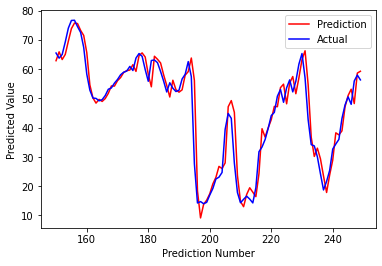

In [80]:
#Validation Predictions
plot_results(X_val,y_val,model3,150,250)

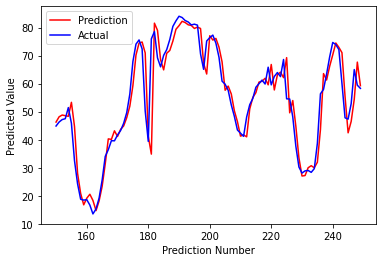

In [81]:
#Test Predictions
plot_results(X_test,y_test,model3,150,250)